Understanding salary trends is crucial in assessing the value of job roles and identifying market opportunities. In this section, I analyze the distribution and patterns in yearly salary data extracted from job postings for data related roles.

The data set originally included both hourly and yearly salary fields. Due to excessive missing values, the salary_hour_avg column was dropped entirely. For consistency and reliability, I also excluded rows with missing salary_year_avg values from this analysis. 

This analysis focuses on:
- Overall salary distribution and descriptive statistics
- Salary comparisons across job titles, locations and companies
- Insights into how specific skills or job requirements influence compensation. 

My goal is to extract meaningful patterns that can guide job seekers, hiring managers, and stakeholders in understanding salary expectations within the data job market.

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned data
df = pd.read_parquet("../data_processed/data_jobs_cleaned.parquet")

# Filter for data jobs postings in the United States and drop null rows
df_US = df[df['job_country'] == 'United States'].dropna(subset = ['salary_year_avg'])



In [2]:
# Check
df_US['salary_year_avg'].isna().sum()

np.int64(0)

### Descriptive Statistics – Yearly Salary

To begin the salary analysis, I explored key statistical metrics for the salary_year_avg column to understand the overall structure of the data.

I calculated:

- Mean Salary – the average yearly salary across all postings
- Median Salary – the middle point in the salary distribution
- Minimum and Maximum – to highlight the range and potential outliers
- Standard Deviation – to assess variability and spread

These statistics help me assess the central tendency and dispersion of salaries across roles. 

In [3]:
df_US['salary_year_avg'].describe()

count     15766.000000
mean     126134.487958
std       48881.042901
min       23496.000000
25%       90000.000000
50%      119187.500000
75%      150000.000000
max      960000.000000
Name: salary_year_avg, dtype: float64

The mean salary is around $126K, while the median is lower at $119.8K, indicating a right-skewed distribution likely influenced by a subset of high-paying roles.

The standard deviation (~$48.8K) suggests considerable variability, likely due to differences in seniority, location, and job type (e.g., entry-level vs senior data scientists).

With a minimum of ~$24K and a maximum of $960K, the range is extremely wide, suggesting potential outliers or executive-level roles in the upper end.

The interquartile range (IQR) spans from $90K to $150K, meaning 50% of the salaries lie within this relatively broad middle range.

These statistics set the stage for a deeper dive into distribution trends, outliers, and comparative salary analysis across roles, locations, and other job attributes.

### Salary by Job Title

To explore how compensation varies across different data roles, I analyzed salary_year_avg grouped by job title. 
The boxplot below displays the distribution of yearly salaries across the top 10 most common job titles in the dataset. Each box represents the interquartile range (IQR) — where the middle 50% of salaries fall — with the vertical line inside the box shows the median. Whiskers extend to show the range, and dots represent outliers.

Key Insights:

Machine Learning Engineers and Cloud Engineers exhibit the highest median salaries among the top roles, with wider spreads, indicating variability based on seniority or specialization.

Senior-level roles like Senior Data Scientist and Senior Data Engineer show both higher medians and a large number of outliers, suggesting significant pay potential at the upper end.

More general roles like Business Analyst and Data Analyst have lower medians and narrower spreads, reflecting more consistent pay ranges.

Some roles (e.g., Data Scientist) show substantial outliers on the high end, pulling the average up — another reason why the median is more representative of typical pay.

This chart helps highlight salary variability across roles, the presence of high-paying outliers, and which job titles generally command higher compensation in the data job market.

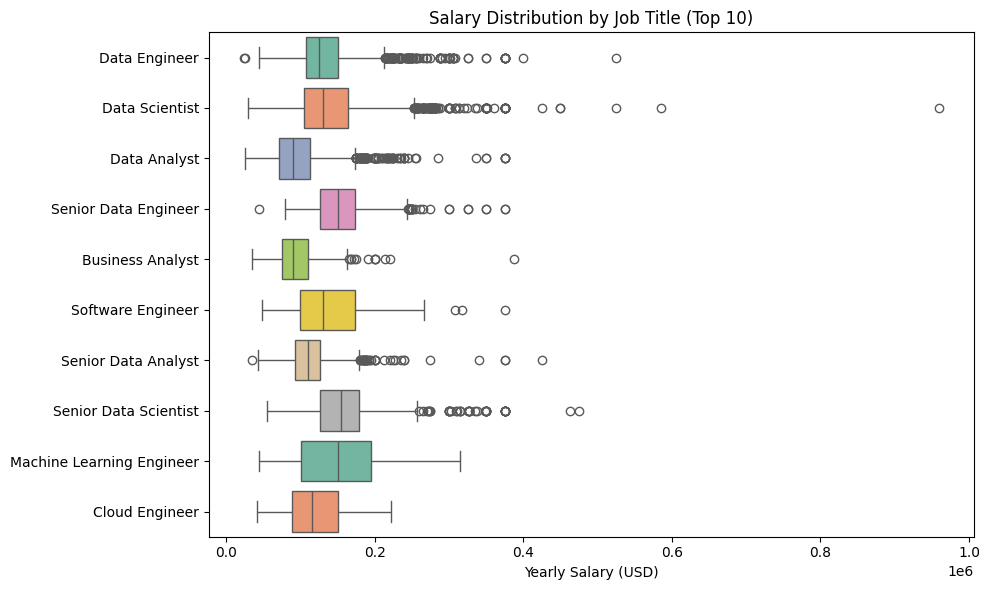

In [4]:
# Prepare aggregated data
# Count top N job titles
top_n = 10
top_jobs = df_US['job_title_short'].value_counts().head(top_n).index

# Filter and aggregate salary by job title
df_roles = df_US[df_US['job_title_short'].isin(top_jobs)]
df_grouped = df_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True).to_frame().reset_index()

# Generate box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_roles[df_roles['job_title_short'].isin(top_jobs)], 
            x='salary_year_avg', y='job_title_short', palette='Set2', hue = 'job_title_short', legend = False)

plt.title('Salary Distribution by Job Title (Top 10)')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Median Salary by State (Top 10)

The chart below shows the median yearly salary for data-related roles across the top 10 U.S. states by job posting volume. Median values are used instead of averages to reduce the influence of extreme outliers and better represent typical compensation within each state.

Each bar is labeled with the median salary value to enable direct comparison.

Key Observations:

California (CA) leads with the highest median salary at $142,500, followed by Virginia (VA) and New York (NY).

These higher salary levels may reflect adjustments for cost of living rather than purely higher-paying job opportunities. States with higher living expenses often offer higher compensation to maintain real purchasing power.

States like Florida (FL) and Illinois (IL) report comparatively lower median salaries, potentially due to lower living costs or different market dynamics.

The overall range across the top 10 — from about $95K to $142K — still suggests that data roles command strong compensation nationwide, with regional variance that may be tied to affordability rather than job scarcity.

This state-level salary comparison helps highlight how location impacts compensation, not just in raw numbers but also in how those numbers relate to everyday living costs.

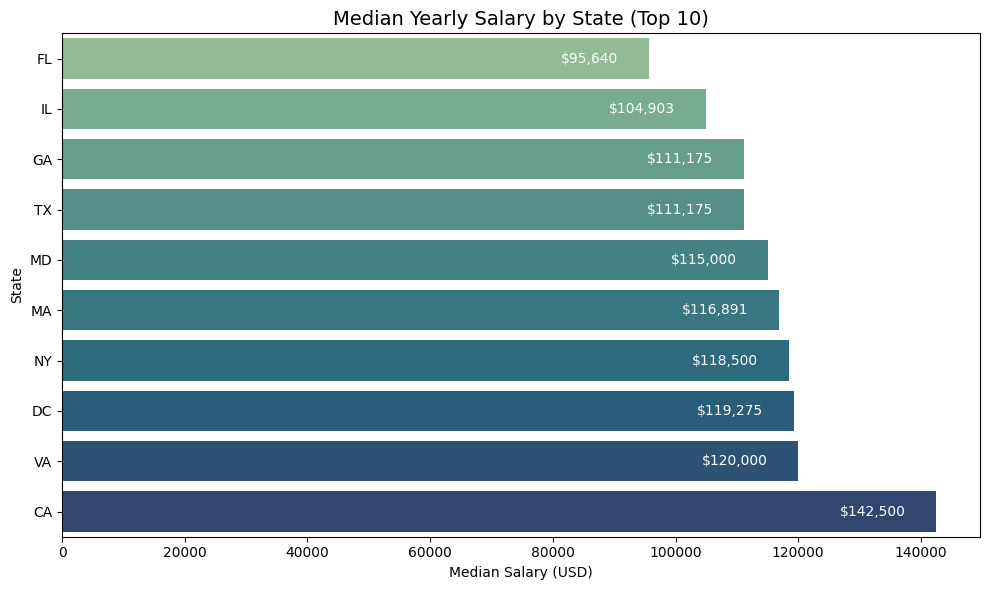

In [5]:
# Prepare the data
df_US['state'] = df_US['job_location'].str.extract(r',\s*([A-Z]{2})$')

# Top N states by count
top_n_states = df_US['state'].value_counts().head(10).index

# Filter and aggregate
df_top_states = df_US[df_US['state'].isin(top_n_states)]
df_state_salary = df_top_states.groupby('state')['salary_year_avg'].median().sort_values(ascending=True).reset_index()

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_state_salary, 
                      x='salary_year_avg', 
                      y='state', 
                      palette='crest',
                      hue='state',
                      legend=False)

# Place label *inside* the bar
for index, row in df_state_salary.iterrows():
    plt.text(row.salary_year_avg - 5000, index, 
             f"${int(row.salary_year_avg):,}", 
             va='center', ha='right', color='white', fontsize=10)

plt.title('Median Yearly Salary by State (Top 10)', fontsize=14)
plt.xlabel('Median Salary (USD)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Salary Distribution by Company (Top 10)

The boxplot below shows the distribution of yearly salaries across the top 10 companies with the highest number of data-related job postings. Each box represents the middle 50% of salaries (interquartile range), while the vertical line inside the box shows the median. Outlier salaries are plotted as individual dots.

This visual not only reveals which companies offer higher compensation but also how variable salaries are within each organization.

Key Observations:

TikTok shows the highest overall salary range and a notably high median, with salaries stretching well beyond $300K — suggesting a strong presence of senior or specialized roles.

Citi and Capital One also exhibit relatively high median salaries with wide spreads, indicating compensation tiers that likely depend on seniority or department.

Companies like Robert Half, Jobot, and CyberCoders show broad distributions with noticeable outliers, suggesting variability in the roles advertised (e.g., contract vs permanent, junior vs senior).

Insight Global, Harnham, and Booz Allen Hamilton have lower medians with tighter clustering in the lower-to-mid salary bands.

Get It Recruit - Information Technology appears to have one of the lowest medians, and the spread is narrower, suggesting more consistent and modest pay across roles.

This chart provides a detailed look into how compensation structures differ by company — whether through wide pay bands, consistent salary ranges, or skewed distributions influenced by outliers.

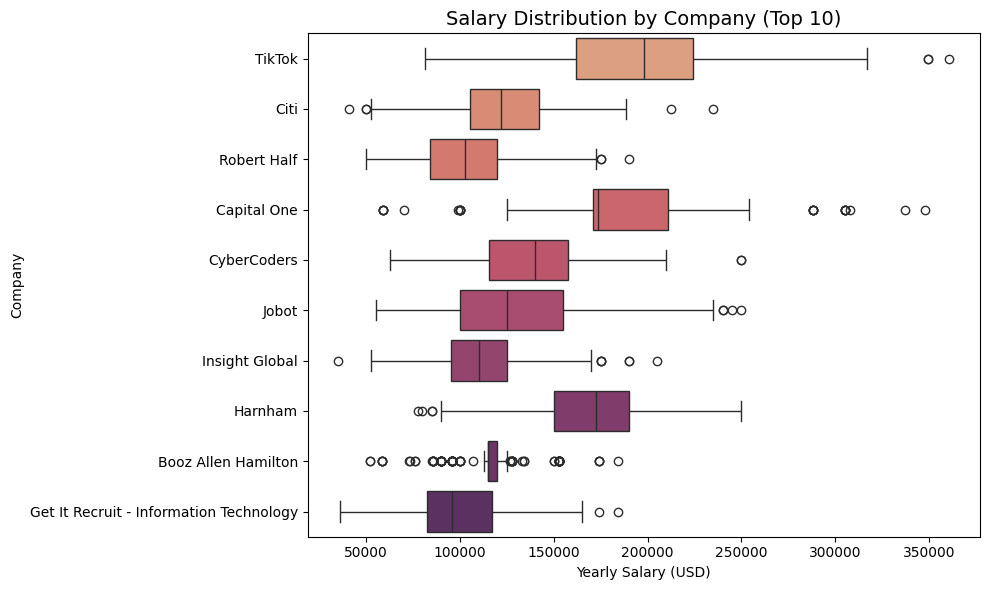

In [6]:
# Identify top 10 companies by job posting count
top_companies = df_US['company_name'].value_counts().head(10).index

# Filter dataset to only those companies
df_top_companies = df_US[df_US['company_name'].isin(top_companies)]

# Calculate median salary per company
df_company_salary = df_top_companies.groupby('company_name')['salary_year_avg']\
    .median().sort_values(ascending=True).reset_index()

#Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_companies, 
            x='salary_year_avg', 
            y='company_name', 
            palette='flare',
            hue='company_name',
            legend=False)

plt.title('Salary Distribution by Company (Top 10)', fontsize=14)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

### Median Salaries by Skill (Top 10)

The chart below visualizes individual salary observations for the top 10 most common technical skills found in job postings. Each point represents a single job listing that included the corresponding skill, with its associated yearly salary. This format allows us to observe not just central tendencies (like the median), but also the spread, density, and outliers associated with each skill.

Key Observations:

SQL, Python, and R dominate the list in terms of job mentions and have relatively broad distributions, reflecting their use in both entry-level and advanced roles.

Cloud-related skills like AWS and Azure appear in fewer postings but tend to skew toward the higher salary ranges, with several roles crossing the $200K mark.

Big data technologies like Spark also show a tendency toward higher compensation, with many roles offering above $150K — suggesting its alignment with specialized or senior-level roles.

BI and visualization tools like Power BI and Tableau show tighter clusters around mid-range salaries, possibly indicating a more consistent compensation structure for reporting-focused roles.

Excel and SAS show dense clusters in the lower to mid salary range, often below $120K, consistent with their use in more traditional, non-specialized roles.

This chart provides a detailed look into how different skills relate to compensation, offering more nuance than a simple average or median. It’s particularly useful for understanding not just which skills pay more, but which ones have greater salary variability — a key consideration for both job seekers and hiring managers.

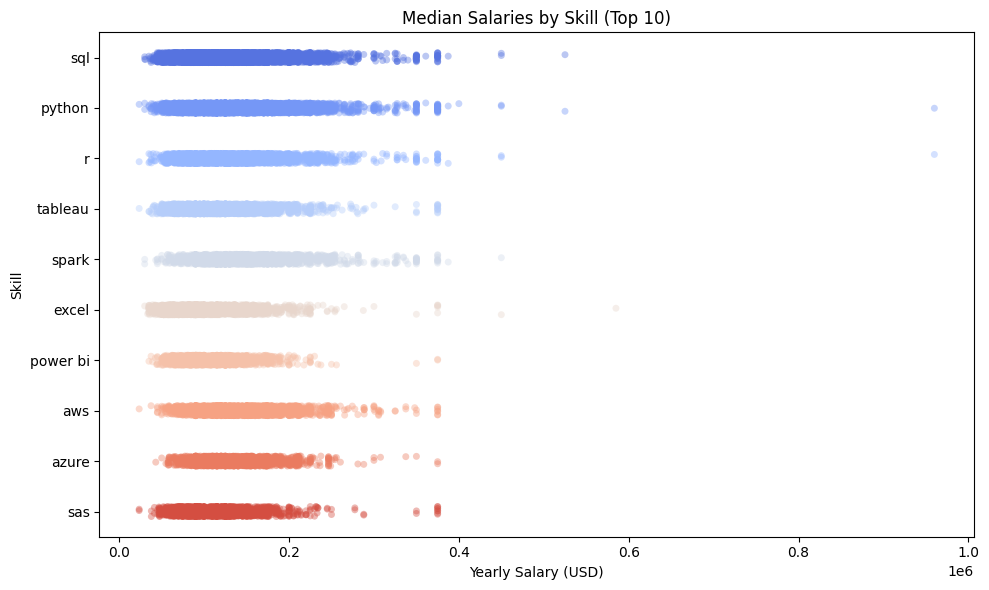

In [7]:
# Drop rows with missing salary or skills, just in case
df_skills = df_US.dropna(subset=['salary_year_avg', 'job_skills'])

# Explode the list of skills so each skill gets its own row
df_exploded = df_skills.explode('job_skills').rename(columns={'job_skills': 'skill'})

# Standardize skills
df_exploded['skill'] = df_exploded['skill'].str.strip().str.lower()

# Get top 10 most common skills
top_skills = df_exploded['skill'].value_counts().head(10).index

# Filter and aggregate
df_top_skills = df_exploded[df_exploded['skill'].isin(top_skills)]
df_skill_salary = df_top_skills.groupby('skill')['salary_year_avg'].median().sort_values(ascending=True).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_top_skills, x='salary_year_avg', y='skill', alpha=0.4, jitter=True, palette='coolwarm', hue='skill', legend=False)

plt.title('Median Salaries by Skill (Top 10)')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

### Highest Paying Skills for Data Analysts (U.S.)

To conclude the salary analysis, I filtered the dataset to include only Data Analyst job postings in the U.S. and analyzed which technical skills were associated with the highest median yearly salaries. This breakdown helps identify which tools and technologies — when listed in job descriptions — tend to correspond with higher compensation for Data Analysts.

The chart below shows the Top 10 skills with the highest median salaries:

Key Observations:

Skills like Yarn, Golang, FastAPI, and Bitbucket rank high in terms of median salary — however, these are typically backend engineering or software development tools, not core Data Analyst tools.

Their presence may reflect hybrid roles (Data Analyst + Developer), job title mislabeling, or outliers due to low sample sizes.

More relevant skills in the list include dplyr (for R users) and perhaps GitLab (used in collaborative workflows).

This reinforces the importance of context when interpreting salary data — high pay does not always mean wide demand or relevance for a typical Data Analyst.

While these results are insightful, it's important to focus on skills that align with analyst responsibilities, such as SQL, Python, Excel, Power BI, Tableau, and data wrangling libraries. These continue to form the foundation of most Data Analyst roles and remain valuable in the age of automation and AI.

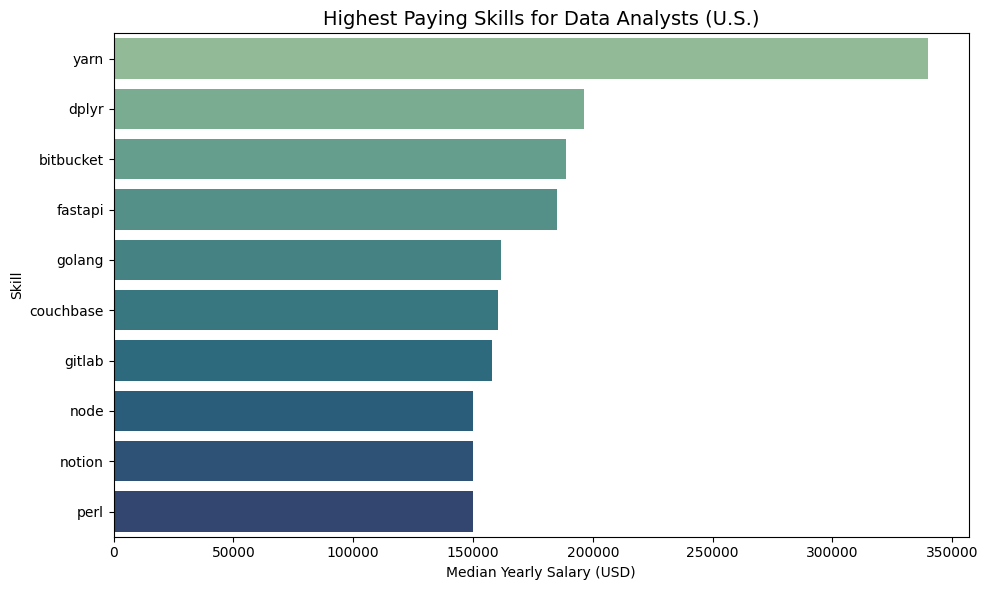

In [8]:
# Filter for Data Analyst Roles in the U.S
df_DA = df_US[df_US['job_title'].str.contains('data analyst', case=False, na=False)]

# Drop nulls
df_DA = df_DA.dropna(subset=['salary_year_avg', 'job_skills'])

# Explode skills
df_DA_exploded = df_DA.explode('job_skills')
df_DA_exploded['job_skills'] = df_DA_exploded['job_skills'].str.strip().str.lower()


# Group by skill and get median salary
df_analyst_skill_salary = (
    df_DA_exploded
    .groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

# Filter to top 10 highest-paid skills
df_top_analyst_skills = df_analyst_skill_salary.head(10)

# Plot

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_analyst_skills, 
            x='salary_year_avg', 
            y='job_skills', 
            palette='crest',
            hue='job_skills', 
            legend=False)

plt.title('Highest Paying Skills for Data Analysts (U.S.)', fontsize=14)
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()